In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

C:\Users\HARSH\Anaconda3\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# train = train_data
# test  = test_data
# Xtrain = train of training data
# Ytrain = target value of training data
# Xtest = test of training data
# Ytest = target value of test data
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

In [5]:
train = pd.read_csv('modified_train.csv', parse_dates=['Day.Index'], dayfirst=True)
test = pd.read_csv('modified_test.csv', parse_dates=['Day.Index'], dayfirst=True)
data = pd.read_csv('modified_data.csv', parse_dates=['Day.Index'], dayfirst=True)
ss = pd.read_csv('samplesubmission.csv')

In [6]:
# #Month Binning
# lead_per_month=train.groupby('Day_Of_Year',as_index=False)["Obtained.Leads"].mean()

# train["NewFinal"]=train["Day_Of_Year"].apply(lambda X: lead_per_month["Obtained.Leads"][X-1])
# test["NewFinal"]=test["Day_Of_Year"].apply(lambda X: lead_per_month["Obtained.Leads"][X-1])

In [7]:
# train=train[train.SpecialDay==0]
# test=test[test.SpecialDay==0]

In [8]:
# train[0:48]

In [9]:
# train=pd.concat([train,train], axis=0)

In [10]:
def remove(k):
    x=train["Obtained.Leads"][train.Month==k]
    IQR =np.percentile(x,q=75)-np.percentile(x,q=25)
    d=np.percentile(x,q=75)+1.3*IQR
    #print(train["Obtained.Leads"][(train.Month==k) & (train["Obtained.Leads"]>d)])
    train["Obtained.Leads"][(train.Month==k) & (train["Obtained.Leads"]>d)]=d
    #print(train["Obtained.Leads"][(train.Month==k) & (train["Obtained.Leads"]>d)])

In [11]:
for i in range(1,13):
    remove(i)

C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
def remove(k):
    x=train["Obtained.Leads"][train.Month==k]
    IQR =np.percentile(x,q=75)-np.percentile(x,q=25)
    d=np.percentile(x,q=25)-1.3*IQR
    #print(train["Obtained.Leads"][(train.Month==k) & (train["Obtained.Leads"]<d)])
    train["Obtained.Leads"][(train.Month==k) & (train["Obtained.Leads"]<d)]=d
    #print(train["Obtained.Leads"][(train.Month==k) & (train["Obtained.Leads"]<d)])

In [13]:
for i in range(1,13):
    remove(i)

In [14]:
# train["Obtained.Leads"][train["Obtained.Leads"]>40]=40

In [15]:
train.corr()

,Campaign,Impressions,Target.Clicks,Obt.Click,Min.CPC,Max.CPC,CTR,Amount.Spend,Returning.Users,Targeted.Leads,...,Avg.Time.Page,Avg.Position,Total.Revenue,Obtained.Leads,Year,Month,Week,Day_Of_Week,Day,Day_Of_Year
Campaign,1.000000,0.619461,0.659964,0.619853,0.347908,0.755494,0.404778,0.638948,0.549974,0.541548,...,0.060295,0.093474,0.533740,0.520943,-0.259169,0.978991,0.944557,-0.004306,0.013530,0.975731
Impressions,0.619461,1.000000,0.703225,0.681323,0.529688,0.740755,0.295069,0.688450,0.659779,0.617074,...,0.314713,0.249366,0.532553,0.784055,-0.105356,0.572569,0.524901,0.010489,0.019452,0.572650
Target.Clicks,0.659964,0.703225,1.000000,0.827817,0.920729,0.969441,0.662810,0.852588,0.872781,0.844468,...,0.517932,0.438497,0.609786,0.759419,-0.065392,0.620561,0.586907,-0.008451,-0.004022,0.621311
Obt.Click,0.619853,0.681323,0.827817,1.000000,0.728074,0.825512,0.891000,0.989759,0.725017,0.975004,...,0.435817,0.328265,0.536327,0.805562,-0.066233,0.587536,0.540588,0.027778,0.005373,0.588052
Min.CPC,0.347908,0.529688,0.920729,0.728074,1.000000,0.846655,0.656254,0.749245,0.780376,0.801831,...,0.581976,0.477371,0.438517,0.658621,0.032685,0.318494,0.298520,-0.010222,-0.011407,0.320995
Max.CPC,0.755494,0.740755,0.969441,0.825512,0.846655,1.000000,0.634862,0.849777,0.838806,0.814346,...,0.374148,0.368525,0.589174,0.730217,-0.111732,0.713183,0.679439,-0.009219,0.001610,0.712655
CTR,0.404778,0.295069,0.662810,0.891000,0.656254,0.634862,1.000000,0.870388,0.549158,0.903192,...,0.392493,0.289500,0.361608,0.583368,-0.007139,0.391182,0.365559,0.022013,-0.003614,0.392156
Amount.Spend,0.638948,0.688450,0.852588,0.989759,0.749245,0.849777,0.870388,1.000000,0.745046,0.983441,...,0.438036,0.340286,0.552077,0.808359,-0.064498,0.606017,0.559113,0.018725,-0.000239,0.606076
Returning.Users,0.549974,0.659779,0.872781,0.725017,0.780376,0.838806,0.549158,0.745046,1.000000,0.720333,...,0.485659,0.415631,0.589872,0.786575,-0.049679,0.507074,0.460579,-0.016563,0.004028,0.508298
Targeted.Leads,0.541548,0.617074,0.844468,0.975004,0.801831,0.814346,0.903192,0.983441,0.720333,1.000000,...,0.492999,0.364870,0.495602,0.785240,-0.026395,0.515404,0.474375,0.016530,-0.005486,0.516158


In [16]:
# train["Z"]=train["Total.Revenue"]/train["Returning.Users"]
# test["Z"]=test["Total.Revenue"]/test["Returning.Users"]

In [17]:
# def function1(X):
#     return int(round(X["Amount.Spend"]/X["Obt.Click"]))
# data["CPC"]=data.apply(function1,axis=1)
# train["CPC"]=train.apply(function1,axis=1)
# test["CPC"]=test.apply(function1,axis=1)

In [18]:
# def function2(X):
#     a=[100]*len(X)
#     return round((X["Returning.Users"]*(100-X["Avg. Bounce.Rate"]))/100)

# data["Lead"]=data.apply(function2,axis=1)
# train["Lead"]=train.apply(function2,axis=1)
# test["Lead"]=test.apply(function2,axis=1)

In [19]:
#Month Binning
lead_per_month=train.groupby('Month',as_index=False)["Obtained.Leads"].mean()
# lead_per_month1=train.groupby('Month',as_index=False)["Obtained.Leads"].std()

train["X1"]=train["Month"].apply(lambda X: lead_per_month["Obtained.Leads"][X-1])
test["X1"]=test["Month"].apply(lambda X: lead_per_month["Obtained.Leads"][X-1])
# train["X2"]=train["Month"].apply(lambda X: lead_per_month1["Obtained.Leads"][X-1])
# test["X2"]=test["Month"].apply(lambda X: lead_per_month1["Obtained.Leads"][X-1])

In [20]:
# lead_per_month

In [21]:
# bins = np.linspace(lead_per_month['Obtained.Leads'].min(), lead_per_month['Obtained.Leads'].max(), 5)
# labels = ['1', '2','3','4']
# month_buckets, returned_bins = pd.cut(lead_per_month['Obtained.Leads'], bins, labels=labels, right=True, include_lowest=True, retbins=True)

# month_buckets = pd.Series(month_buckets)
# month_buckets

In [22]:
# train['Month_Bucket'] = 1
# train.loc[((train['Month'] == 1) | (train['Month'] == 2)), 'Month_Bucket'] = 2
# train.loc[((train['Month'] == 9) | (train['Month'] == 10)), 'Month_Bucket'] = 3
# train.loc[((train['Month'] == 11) | (train['Month'] == 12)), 'Month_Bucket'] = 4
# test['Month_Bucket'] = 1
# test.loc[((test['Month'] == 1) | (test['Month'] == 2)), 'Month_Bucket'] = 2
# test.loc[((test['Month'] == 9) | (test['Month'] == 10)), 'Month_Bucket'] = 3
# test.loc[((test['Month'] == 11) | (test['Month'] == 12)), 'Month_Bucket'] = 4

# df_minCPC = pd.get_dummies(train['Month_Bucket'], prefix='Month')
# train = pd.concat([train.drop(['Month'], axis=1), df_minCPC], axis=1)
# df_minCPC = pd.get_dummies(test['Month_Bucket'], prefix='Month')
# test = pd.concat([test.drop(['Month'], axis=1), df_minCPC], axis=1)

In [23]:
# def func(X):
#     return a[X["Avg.Position"]]

# train["X"]=train.apply(func,axis=1)
# test["X"]=test.apply(func,axis=1)

In [24]:
# train[["Month","X"]]

In [25]:
# train['Avg_Position_Bucket'] = 1
# train.loc[((train['Avg.Position'] == 6) | (train['Avg.Position'] == 7)), 'Avg_Position_Bucket'] = 2

# test['Avg_Position_Bucket'] = 1
# test.loc[((test['Avg.Position'] == 6) | (test['Avg.Position'] == 7)), 'Avg_Position_Bucket'] = 2

In [26]:
# train['X11'] = train["X1"].rolling(window=13).mean()
# test['X11'] = test["X1"].rolling(window=13).mean()

In [27]:
train.columns,test.columns

(Index(['Day.Index', 'Campaign', 'Impressions', 'Target.Clicks', 'Obt.Click',
        'Min.CPC', 'Max.CPC', 'CTR', 'Amount.Spend', 'Returning.Users',
        'Targeted.Leads', 'SpecialDay', 'Avg. Bounce.Rate', 'Avg.Time.Page',
        'Avg.Position', 'Total.Revenue', 'Obtained.Leads', 'Year', 'Month',
        'Week', 'Day_Of_Week', 'Day', 'Day_Of_Year', 'X1'],
       dtype='object'),
 Index(['Day.Index', 'Campaign', 'Impressions', 'Target.Clicks', 'Obt.Click',
        'Min.CPC', 'Max.CPC', 'CTR', 'Amount.Spend', 'Returning.Users',
        'Targeted.Leads', 'SpecialDay', 'Avg. Bounce.Rate', 'Avg.Time.Page',
        'Avg.Position', 'Total.Revenue', 'Year', 'Month', 'Week', 'Day_Of_Week',
        'Day', 'Day_Of_Year', 'X1'],
       dtype='object'))

In [28]:
#Preparing data
def prepare_data(df, is_train):
#     train_Avg_Position_dummies = pd.get_dummies(df['Avg.Position'], prefix='Avg.Position')
#     df = pd.concat([df.drop(['Avg.Position'], axis=1), train_Avg_Position_dummies], axis=1)

#     df_minCPC = pd.get_dummies(df['Min.CPC'], prefix='Min.CPC')
#     df = pd.concat([df.drop(['Min.CPC'], axis=1), df_minCPC], axis=1)
    
#     df_campaign = pd.get_dummies(df['Campaign'], prefix='campaign')
#     df = pd.concat([df, df_campaign], axis=1)
    
#     df_month = pd.get_dummies(df['Month'], prefix='Month')
#     df = pd.concat([df.drop(['Month'], axis=1), df_month], axis=1)
    
    if is_train:
        return df.drop(['Obtained.Leads','Day.Index',"Week","Day_Of_Week","Day","Day_Of_Year"], axis=1), df['Obtained.Leads']
    return     df.drop([                 "Day.Index","Week","Day_Of_Week","Day","Day_Of_Year"], axis=1)

In [29]:
train.columns

Index(['Day.Index', 'Campaign', 'Impressions', 'Target.Clicks', 'Obt.Click',
       'Min.CPC', 'Max.CPC', 'CTR', 'Amount.Spend', 'Returning.Users',
       'Targeted.Leads', 'SpecialDay', 'Avg. Bounce.Rate', 'Avg.Time.Page',
       'Avg.Position', 'Total.Revenue', 'Obtained.Leads', 'Year', 'Month',
       'Week', 'Day_Of_Week', 'Day', 'Day_Of_Year', 'X1'],
      dtype='object')

In [30]:
train.head()

,Day.Index,Campaign,Impressions,Target.Clicks,Obt.Click,Min.CPC,Max.CPC,CTR,Amount.Spend,Returning.Users,...,Avg.Position,Total.Revenue,Obtained.Leads,Year,Month,Week,Day_Of_Week,Day,Day_Of_Year,X1
0,2013-01-01,1,13930,225,200,28,31,1.44,6200,36,...,5,2401,20.0,2013,1,1,1,1,1,14.721505
1,2013-01-02,1,11177,225,288,28,31,2.58,8352,27,...,3,4033,18.0,2013,1,1,2,2,2,14.721505
2,2013-01-03,1,12968,225,211,28,31,1.63,5908,31,...,1,4637,13.0,2013,1,1,3,3,3,14.721505
3,2013-01-04,1,13850,225,238,28,31,1.72,6664,38,...,2,3597,26.0,2013,1,1,4,4,4,14.721505
4,2013-01-05,1,12346,225,259,28,31,2.10,7511,41,...,8,1923,18.0,2013,1,1,5,5,5,14.721505


In [31]:
#Splitting Data
train_train_data = train[(train["Year"]==2013) |((train["Year"]==2014) & (train["Month"]<4))]
test_train_data = train[(train["Year"]==2015) |((train["Year"]==2014) & (train["Month"]>3))]

In [32]:
# #Splitting Data
# train_train_data = train[(train["Year"]==2013) |((train["Year"]==2014) )]
# test_train_data = train[(train["Year"]==2015)]

In [33]:
train_train_data.shape

(455, 24)

In [34]:
a=train_train_data[train_train_data.SpecialDay==1]

In [35]:
# train_train_data=pd.concat([a,train_train_data],axis=0)
# train_train_data=pd.concat([a,train_train_data],axis=0)
# train_train_data=pd.concat([a,train_train_data],axis=0)
# train_train_data=pd.concat([a,train_train_data],axis=0)
# train_train_data=pd.concat([a,train_train_data],axis=0)
# train_train_data=pd.concat([a,train_train_data],axis=0)
# train_train_data=pd.concat([a,train_train_data],axis=0)
# train_train_data=pd.concat([a,train_train_data],axis=0)
# train_train_data=pd.concat([a,train_train_data],axis=0)
# train_train_data=pd.concat([a,train_train_data],axis=0)

In [36]:
train_train_data.shape

(455, 24)

In [37]:
train,target_train=prepare_data(train,1)
test=prepare_data(test,0)
Xtrain, Ytrain=prepare_data(train_train_data,1)
Xtest, Ytest=prepare_data(test_train_data,1)

In [38]:
Xtrain.columns

Index(['Campaign', 'Impressions', 'Target.Clicks', 'Obt.Click', 'Min.CPC',
       'Max.CPC', 'CTR', 'Amount.Spend', 'Returning.Users', 'Targeted.Leads',
       'SpecialDay', 'Avg. Bounce.Rate', 'Avg.Time.Page', 'Avg.Position',
       'Total.Revenue', 'Year', 'Month', 'X1'],
      dtype='object')

In [39]:
from sklearn.grid_search import GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [40]:
# param_test1 = {
#  'max_depth':list(range(1,5,1),),
#  'min_child_weight':list(range(3,7,1))
# }
# gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.05, n_estimators=1000, max_depth=4,
#  min_child_weight=4, gamma=1, subsample=0.75, objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
#  param_grid = param_test1,n_jobs=4,iid=False, cv=5,scoring='mean_squared_error')
# gsearch1.fit(Xtrain,Ytrain)
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [41]:
# "objective": "reg:linear",
#           "booster" : "gbtree",
#           "eta": 0.045,
#           "max_depth":3,
#           "subsample": 0.76,
#           "colsample_bytree": 0.5,
#           'gamma':0,
#           'min_child_weight':4,
#           "silent": 1,
#           "seed": 1301

In [42]:
import xgboost as xgb

import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.045,
          "max_depth":3,
          "subsample": 0.76,
          "colsample_bytree": 0.5,
          'gamma':0,
          'min_child_weight':4,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 2000


print("Train a XGBoost model")
dtrain = xgb.DMatrix(Xtrain, Ytrain)
dvalid = xgb.DMatrix(Xtest, Ytest)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=50, verbose_eval=1600)

Train a XGBoost model
[0]	train-rmse:15.1531	eval-rmse:15.9875
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 50 rounds.
[1600]	train-rmse:0.133677	eval-rmse:1.48388
Stopping. Best iteration:
[1569]	train-rmse:0.137925	eval-rmse:1.48359



In [43]:
import sklearn

In [44]:
c=(sklearn.metrics.mean_squared_error(gbm.predict(xgb.DMatrix(Xtrain)),Ytrain))**.5

In [45]:
# a=b
# b=gbm.best_score
# a,b,c

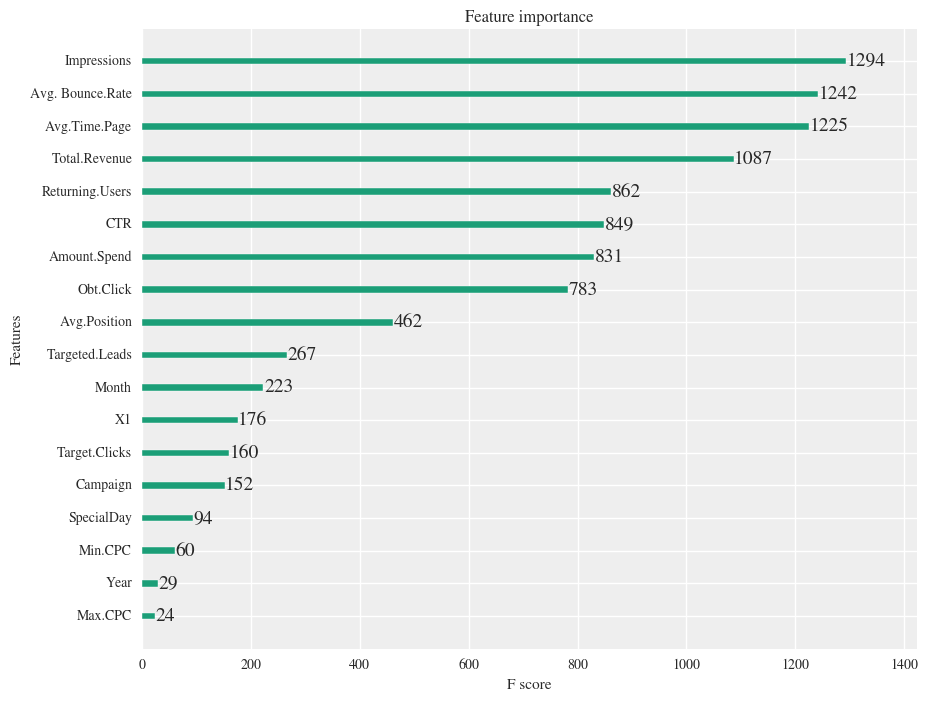

In [46]:
#xgb.plot_importance(gbm,height=1)
ax = xgb.plot_importance(gbm)
fig = ax.figure
fig.set_size_inches(10,8)

In [47]:
train.shape

(820, 18)

In [48]:
# a=train[train["SpecialDay"]==1]
# train=pd.concat([a,train])

In [49]:
train.shape

(820, 18)

In [50]:
dtrain = xgb.DMatrix(train, target_train)
dvalid = xgb.DMatrix(Xtest, Ytest)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=50, verbose_eval=400)

[0]	train-rmse:15.5143	eval-rmse:15.97
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 50 rounds.
[400]	train-rmse:0.744713	eval-rmse:0.714536
[800]	train-rmse:0.472391	eval-rmse:0.455619
[1200]	train-rmse:0.332585	eval-rmse:0.326388
[1600]	train-rmse:0.247281	eval-rmse:0.245665


In [51]:
test.head()

,Campaign,Impressions,Target.Clicks,Obt.Click,Min.CPC,Max.CPC,CTR,Amount.Spend,Returning.Users,Targeted.Leads,SpecialDay,Avg. Bounce.Rate,Avg.Time.Page,Avg.Position,Total.Revenue,Year,Month,X1
0,2,16919,170,220,26,31,1.30,5940,27,11,1,59.45,239,3,2687,2015,4,11.7
1,2,13708,170,236,26,31,1.72,7316,20,14,0,44.10,163,3,1379,2015,4,11.7
2,2,13251,170,158,26,31,1.19,4898,24,9,0,83.81,245,5,1968,2015,4,11.7
3,2,12803,170,119,26,31,0.93,3570,19,7,0,8.87,202,1,2510,2015,4,11.7
4,2,12955,170,147,26,31,1.13,3969,18,7,0,58.47,241,5,1982,2015,4,11.7


In [52]:
predictTrain=gbm.predict(xgb.DMatrix(test))

In [53]:
predictTrain[0:5]

array([ 17.12914085,  14.01272774,   8.33505344,   8.75003242,   7.0930419 ], dtype=float32)

In [54]:
# predictTrain=np.exp(predictTrain)

In [55]:
predicted = np.round(predictTrain, decimals=0).astype(int)
predicted[0:5]

array([17, 14,  8,  9,  7])

In [56]:
solution = pd.DataFrame(ss['Day.Index'])
solution = pd.concat([solution, pd.DataFrame(predicted, columns=['Obtained.Leads'])], axis=1)

In [58]:
# path='C:\\Users\\HARSH\\Desktop\\Data_Tales\\Submit\\'
# solution.to_csv(path+r'FINAL.csv', index=False)

In [ ]:
solution.tail()

In [ ]:
#no